<a href="https://colab.research.google.com/github/sunghyouk/study_room/blob/master/self_ML_DL_study_text/ch8_2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

08-1은 설명만 있음

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
# 1. 합성곱 층 만들기
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28, 28, 1)))

In [3]:
# 2. 풀링층 만들기
model.add(keras.layers.MaxPooling2D(2))

In [4]:
# 3. 두번째 합성곱-풀링 층 만들기
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
# 4. 밀집층에 전달할 일렬 데이터
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

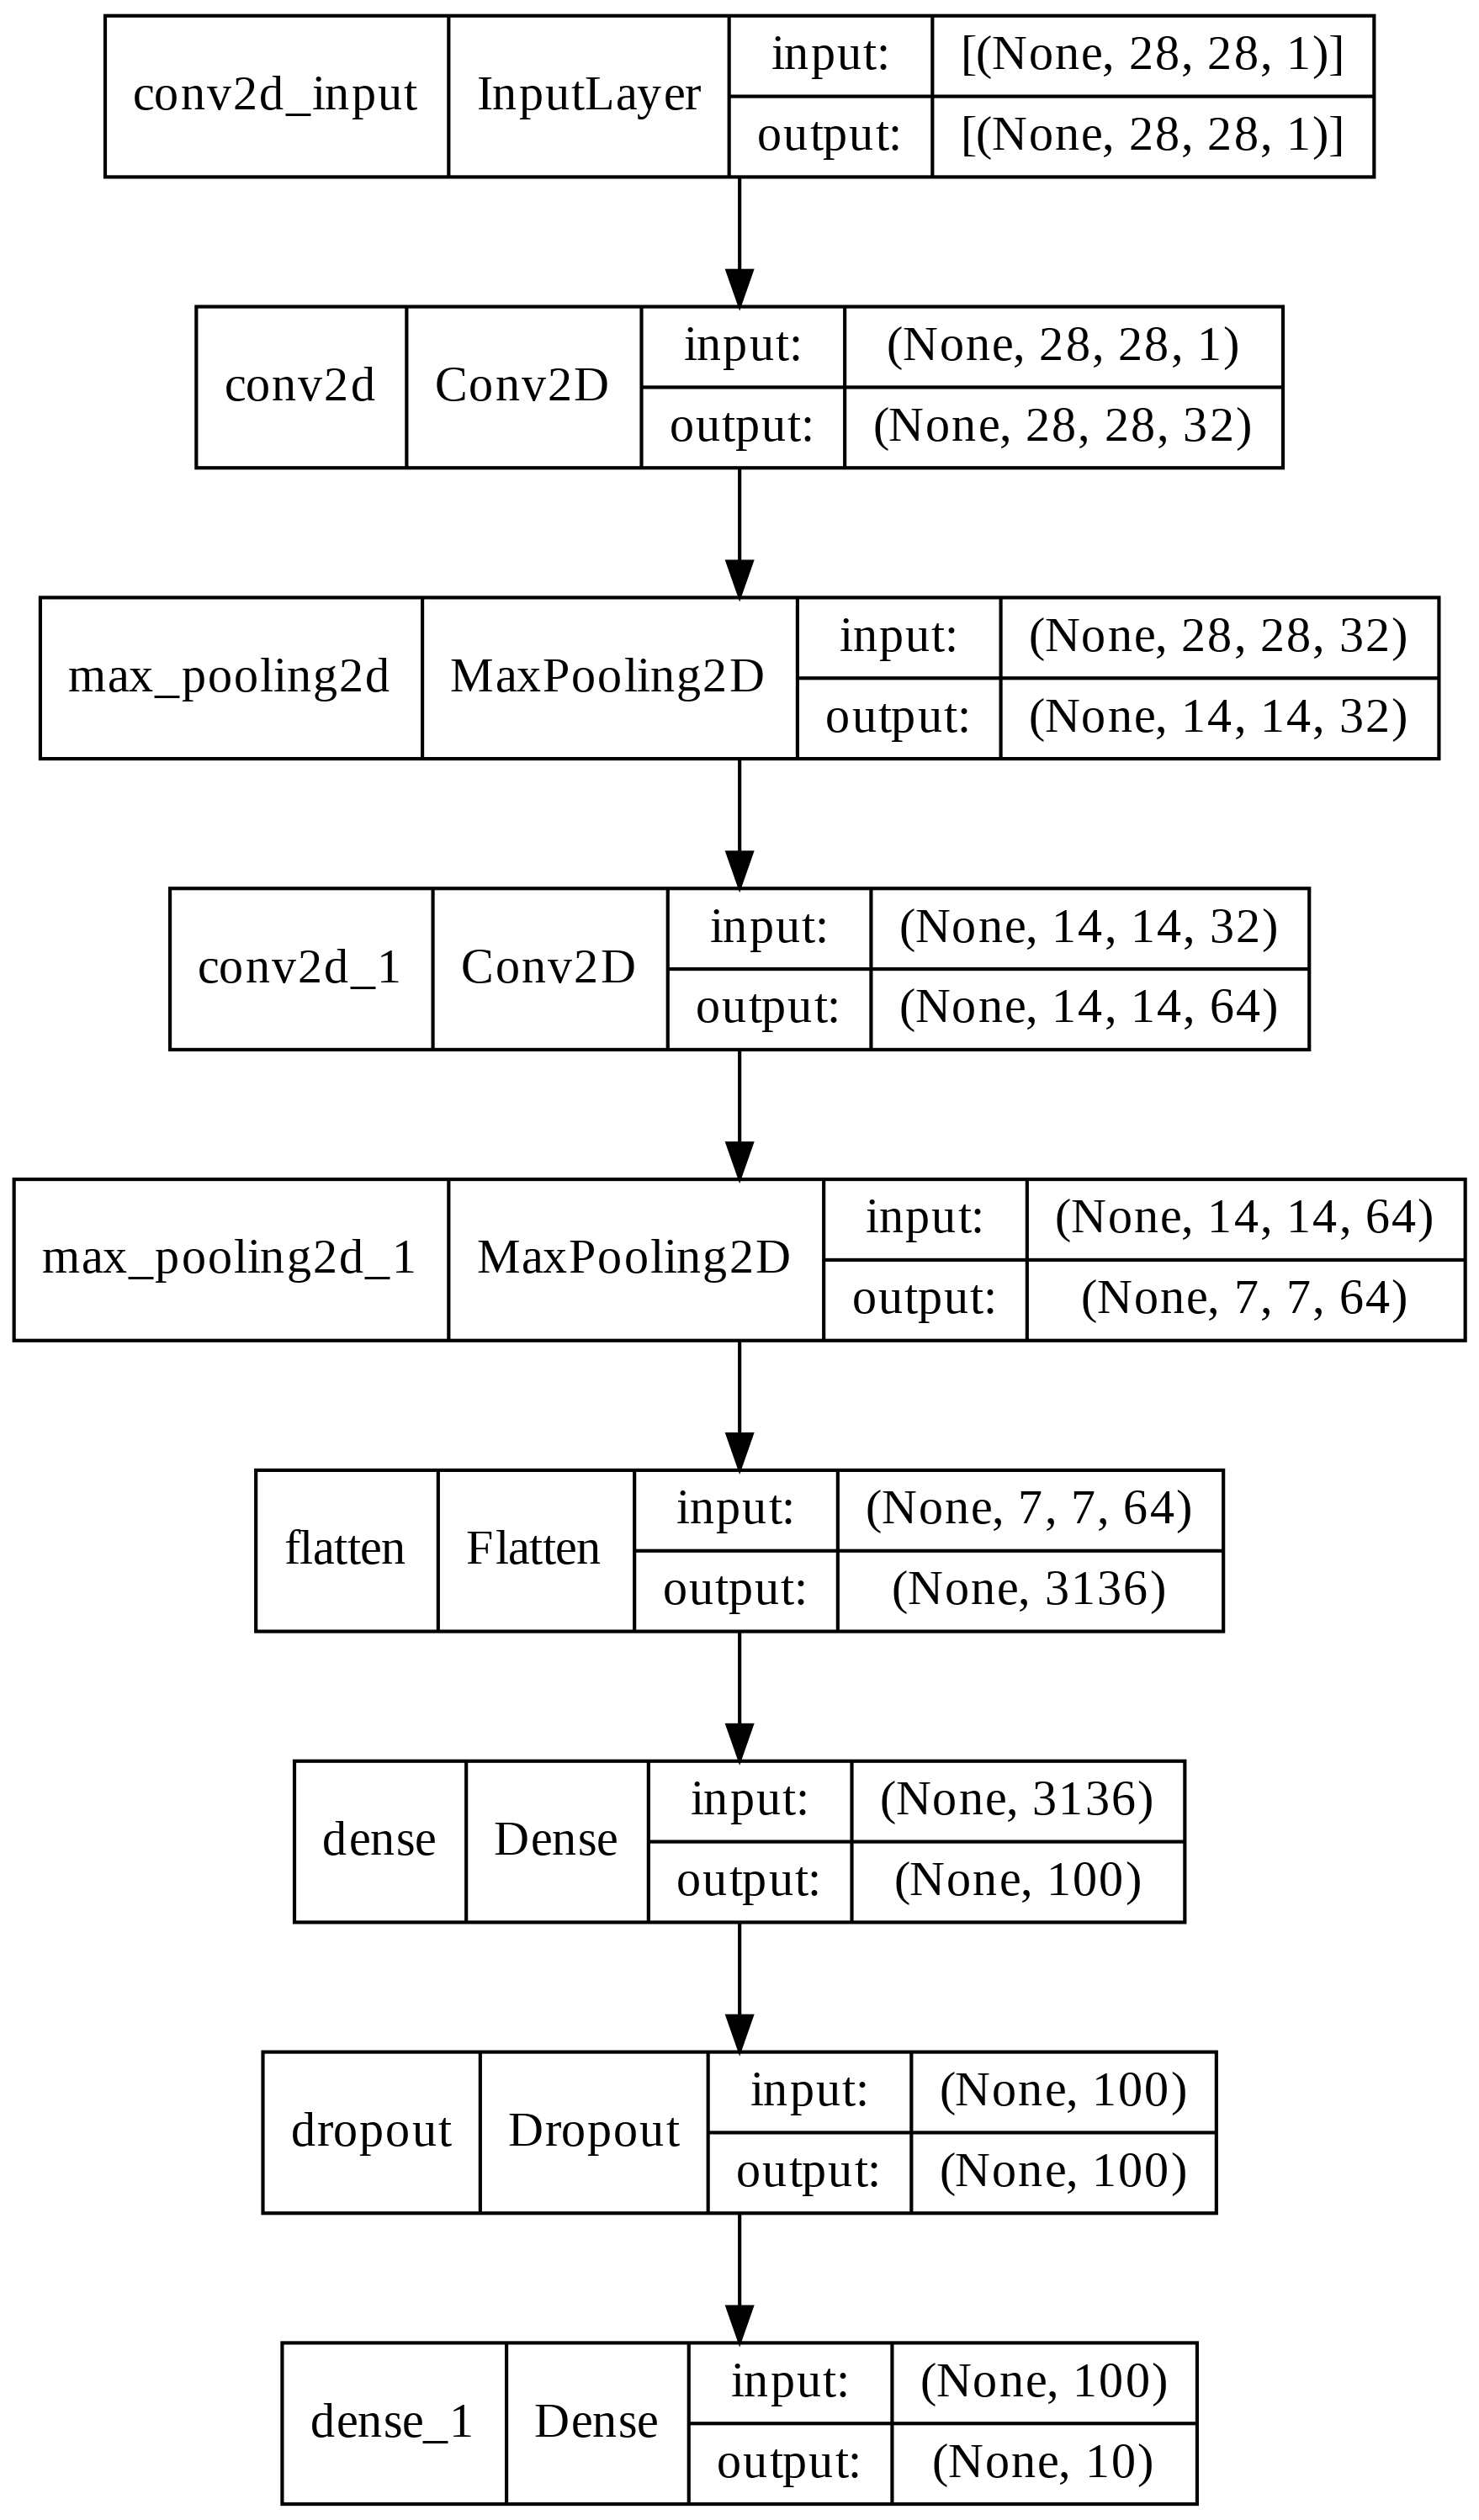

In [7]:
keras.utils.plot_model(model, show_shapes=True,
                       to_file='cnn-architecture.png', dpi=300)

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 55s 36ms/step - loss: 0.5241 - accuracy: 0.8130 - val_loss: 0.3252 - val_accuracy: 0.8780
Epoch 2/20
1500/1500 [==============================] - 54s 36ms/step - loss: 0.3494 - accuracy: 0.8744 - val_loss: 0.2811 - val_accuracy: 0.8972
Epoch 3/20
1500/1500 [==============================] - 54s 36ms/step - loss: 0.3005 - accuracy: 0.8919 - val_loss: 0.2592 - val_accuracy: 0.9044
Epoch 4/20
1500/1500 [==============================] - 54s 36ms/step - loss: 0.2680 - accuracy: 0.9026 - val_loss: 0.2447 - val_accuracy: 0.9096
Epoch 5/20
1500/1500 [==============================] - 53s 36ms/step - loss: 0.2438 - accuracy: 0.9096 - val_loss: 0.2390 - val_accuracy: 0.9114
Epoch 6/20
1500/1500 [==============================] - 53s 36ms/step - loss: 0.2242 - accuracy: 0.9187 - val_loss: 0.2348 - val_accuracy: 0.9107
Epoch 7/20
1500/1500 [==============================] - 53s 36ms/step - loss: 0.2056 - accuracy: 0.9241 - val_loss: 0.2313 -

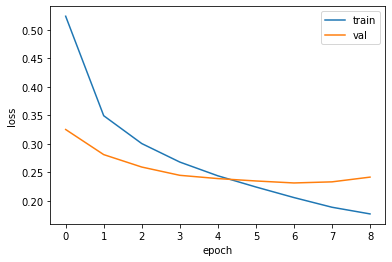

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [10]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 9ms/step - loss: 0.2313 - accuracy: 0.9141


[0.2312851995229721, 0.9140833616256714]

In [11]:
test_scaled = test_input.reshape(-1, 28, 28, 1) /255.0

In [12]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 10ms/step - loss: 0.2542 - accuracy: 0.9082


[0.25420811772346497, 0.9082000255584717]

## 08-3 합성곱 신경망의 시각화
### 가중치 시각화

In [13]:
model = keras.models.load_model('best-cnn-model.h5')

In [14]:
model.layers

In [15]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [16]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.026386311 0.2663263


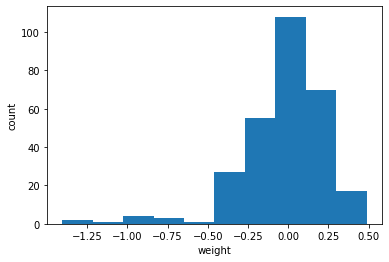

In [17]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

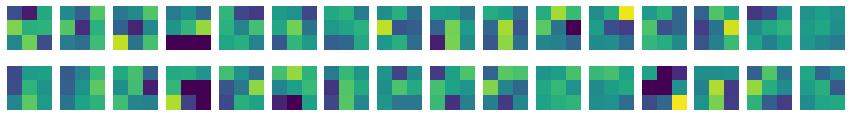

In [18]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0 , i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

#### 훈련한 합성곱 신경망과 빈 합성곱 신경망의 시각적 비교

In [19]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                          'relu', padding='same', input_shape=(28, 28, 1)))

In [20]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [21]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0015678962 0.08318057


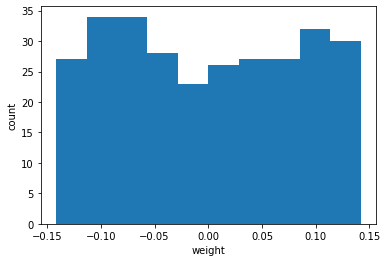

In [22]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

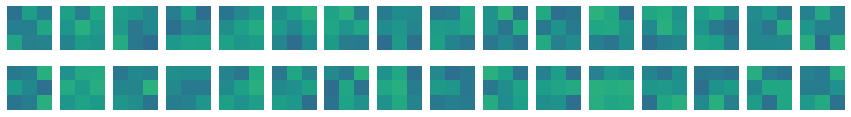

In [23]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0 , i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

### 함수형 API

`Sequential` 클래스는 자동으로 InputLayer 클래스를 자동으로 추가해 주지만,  
`함수형 API`에서는 케라스 모델의 _layers 속성의 첫번째 항목이 InputLayer 클래스의 객체이다.  
이 출력값을 inputs로 넣어야 하는데, 수동으로 이를 찾아서 넣어야 한다.

In [34]:
inputs = keras.Input(shape=(784, ))
conv_acti = keras.Model(model.input, model.layers[0].output)

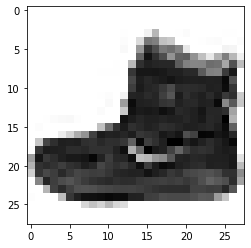

In [35]:
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [36]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [37]:
print(feature_maps.shape)

(1, 28, 28, 32)


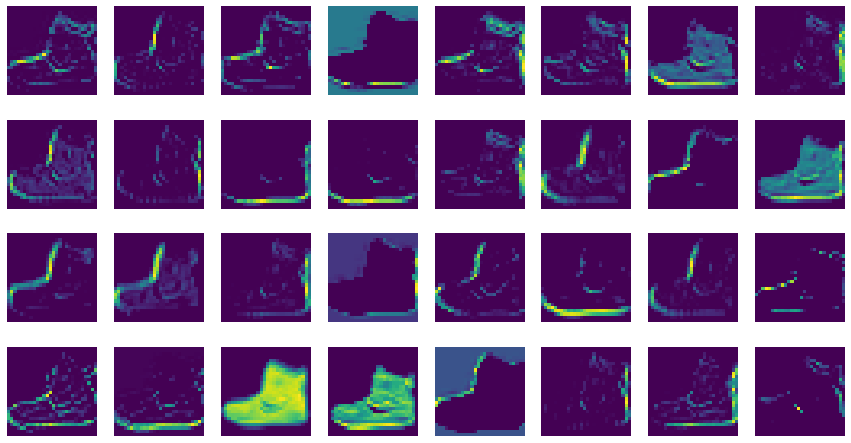

In [38]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [39]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [40]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

두번째 합성곱 층이 만든 특성 맵 출력하기

In [41]:
print(feature_maps.shape)

(1, 14, 14, 64)


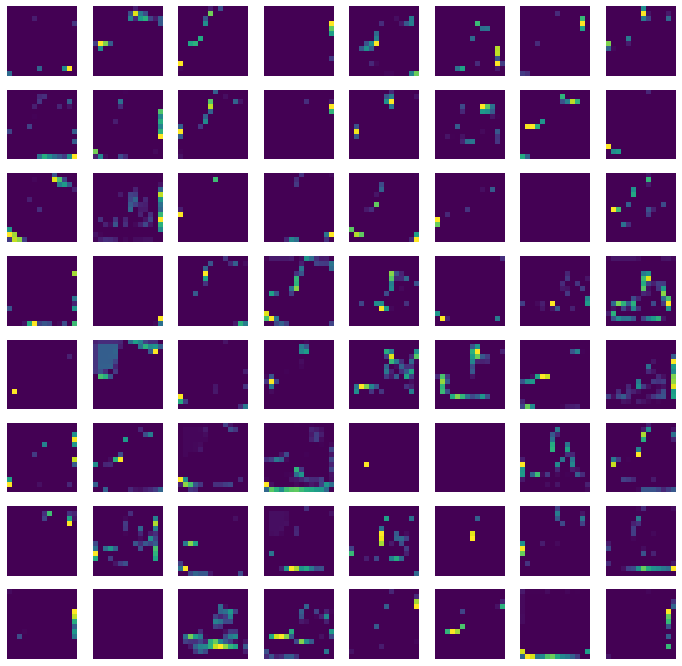

In [42]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
        axs[i, j].axis('off')
plt.show()